# Python And Data Analysis Project
Day 10 of Xccelerate Full-time Data Science Cohort 03  
Date: 29th Oct 2018

## 1. Define the Business Need
We are going to look at Crossfit Open 2018 and 2017 dataset provide by [Ray Bell](https://github.com/raybellwaves/cfanalytics/tree/master/Data). Jean-Michel Daignan wrote a [great piece](http://jmdaignan.com/2018/03/30/crossfitopen/) on how to scrape the Crossfit Game website as of 2018. The webscrapping part will be out of scope for this project. The focus will mainly be on data analysis.  

Using the open results from 2018 and 2017, we want to find which affliate serves its member in the best way. One indication of a great affliate is the community. Another is the quality of coaching. So in short we want to answer two questions:  
1. For a given `Region` which affliate improved its members' participation in the open the most, from 2017 to 2018?
2. For a given `Region` which affliate's athlete improved the most from 2017 to 2018?

## 2. Explore the Data

In [48]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

sns.set(color_codes=True) #overide maplot libs ugly colours.
mpl.rcParams['figure.figsize'] = [13, 8] #default figure size

In [16]:
url_head = 'https://raw.githubusercontent.com/raybellwaves/cfanalytics/master/Data/'

l_18url = [
    url_head + 'Women_Rx_2018.csv',
    url_head + 'Men_Rx_2018.csv'
]

l_17url = [
    url_head + 'Women_Rx_2017.csv',
    url_head + 'Men_Rx_2017.csv'
]

gyms_url = url_head + 'Affiliate_list.csv'

In [17]:
l_d17 = [pd.read_csv(iurl) for iurl in l_17url]

/Users/JHO/.virtualenvs/accelerateHK3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2850: DtypeWarning: Columns (13,20) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [22]:
l_d17[0].head(3)

,Unnamed: 0,Userid,Name,Height (m),Weight (kg),Age,Regionid,Regionname,Affiliateid,Overallrank,...,17.3_score,17.3_percentile,17.3_predicted_reps,17.4_rank,17.4_score,17.4_percentile,17.5_rank,17.5_score,17.5_percentile,17.5_predicted_time
0,0,8859,Ragnheiður Sara Sigmundsdottir,1.71,69.0,24,6,Central East,0,1,...,0 days 00:18:03,99.9965,287.0,2,328.0,99.9987,6,0 days 00:06:32,99.9928,0 days 00:06:32.000000000
1,1,305891,Kari Pearce,1.60,NaN,28,11,North East,18553,2,...,0 days 00:18:24,99.9912,282.0,4,320.0,99.9961,11,0 days 00:06:44,99.9856,0 days 00:06:44.000000000
2,2,8404,Camille Leblanc-Bazinet,1.57,NaN,28,17,South West,386,3,...,0 days 00:16:11,99.9982,320.0,3,325.0,99.9974,7,0 days 00:06:34,99.9913,0 days 00:06:34.000000000


In [4]:
l_d18 = [pd.read_csv(iurl) for iurl in l_18url]
dgyms = pd.read_csv(gyms_url)

/Users/JHO/.virtualenvs/accelerateHK3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2850: DtypeWarning: Columns (16,18,29) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
/Users/JHO/.virtualenvs/accelerateHK3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2850: DtypeWarning: Columns (24,29) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [6]:
l_d18[0].head(3)

,Unnamed: 0,User_id,Name,Height_(m),Weight_(kg),Age,Region_id,Region_name,Affiliate_id,Overall_rank,...,18.3_predicted_time,18.3_predicted_reps,18.4_rank,18.4_score,18.4_percentile,18.4_predicted_time,18.4_predicted_reps,18.5_rank,18.5_score,18.5_percentile
0,0,123582,Cassidy Lance-Mcwherter,1.60,64.0,30,15,South East,16524,1,...,NaN,NaN,8,0 days 00:06:30,99.9911,0 days 00:06:30.000000000,228.0,10,186.0,99.9885
1,1,2942,Kara Saunders,1.62,73.0,28,21,Australasia,19961,2,...,NaN,NaN,23,0 days 00:06:51,99.9720,0 days 00:06:51.000000000,217.0,1,201.0,100.0000
2,2,239148,Carolyne Prevost,1.60,66.0,28,18,Canada East,718,3,...,NaN,NaN,20,0 days 00:06:49,99.9758,0 days 00:06:49.000000000,218.0,19,183.0,99.9770


In [5]:
l_d18[1].head(3)

,Unnamed: 0,User_id,Name,Height_(m),Weight_(kg),Age,Region_id,Region_name,Affiliate_id,Overall_rank,...,18.3_predicted_time,18.3_predicted_reps,18.4_rank,18.4_score,18.4_percentile,18.4_predicted_time,18.4_predicted_reps,18.5_rank,18.5_score,18.5_percentile
0,0,153604,Mathew Fraser,1.70,86.0,28,6,Central East,3220,1,...,0 days 00:14:11.000000000,916.0,5,0 days 00:06:39,99.9971,0 days 00:06:39.000000000,223.0,1,198.0,100.0000
1,1,180541,Alex Vigneault,1.80,92.0,26,18,Canada East,10990,2,...,0 days 00:15:55.000000000,816.0,7,0 days 00:06:48,99.9956,0 days 00:06:48.000000000,218.0,47,179.0,99.9684
2,2,702092,Willy Georges,1.79,86.0,25,24,Europe South,16786,3,...,0 days 00:14:50.000000000,876.0,168,0 days 00:08:21,99.8785,0 days 00:08:21.000000000,178.0,5,188.0,99.9973


#### 2017 and 2018 data columns are different, so we need to rename them

In [ ]:
col_map = {'Userid':'User_id', 
           'Height (m)': 'Height_(m)', 
           'Weight (kg)':'Weight_(kg)',
           'Regionid':'Region_id',
           'Regionname':'Region_name',
           'Affiliateid':'Affiliate_id',
           'Overallrank':'Overall_rank'}
l_d17 = [d.rename(columns = col_map) for d in l_d17]
l_d17[0].head(3)


In [7]:
dgyms.head(3)

,Unnamed: 0,Affiliate_id,Affiliate_name,Address,City,State,Zip,Country,Website,Phone,Latitude,Longitude
0,0,3,CrossFit Persist,"165 Amboy Ave, #705",Morganville,NJ,07751,United States,http://www.crossfitpersist.com/,(732) 687-1050,40.3604,-74.2894
1,1,4,Far North CrossFit,17 Finlayson Street,Whangarei,Northland,0110,New Zealand,http://www.farnorthcrossfit.com,021 022 09234,-35.7270,174.3274
2,2,5,CrossFit Dubuque,3080 Cedar Crest Ct.,Dubuque,IA,52003,United States,http://crossfitdubuque.com/,(563) 552-8423,42.4787,-90.7068


### Cleaning the data
In the data frame that we want, we just want to have **region data**, **Overall_rank**, and a new column for **sex**

In [13]:
def JoinAllAthletes( df_ladies, df_men):
    l_columns = ['User_id', 'Name', 'Height_(m)', 'Weight_(kg)','Age',
                 'Region_id','Region_name','Affiliate_id','Overall_rank']
    dfl = df_ladies.loc[:, l_columns].set_index('User_id')
    dfm = df_men.loc[:, l_columns].set_index('User_id')
    dfl['Sex'] = 'F'
    dfm['Sex'] = 'M'
    
    return pd.concat([dfl, dfm])

JoinAllAthletes( l_d18[0], l_d18[1]).sample(10)

,Name,Height_(m),Weight_(kg),Age,Region_id,Region_name,Affiliate_id,Overall_rank,Sex
User_id,,,,,,,,,
313684,Deryn Macey,1.65,77.0,35,5,Canada West,1285,26504,F
727319,Diana Kjærulff,1.70,88.0,36,22,Europe North,19197,93988,F
1322281,Simon Martin,NaN,NaN,41,21,Australasia,19914,169731,M
1327407,Aly Passarelli,1.45,68.0,37,11,North East,0,29662,F
903965,Tiphaine Kubiak,1.56,51.0,26,24,Europe South,10857,61687,F
276609,Paul Watters,NaN,97.0,40,21,Australasia,9015,9877,M
1396681,Kristina Folsom,NaN,NaN,32,19,West Coast,7025,75041,F
1398112,Veronika Vrazelova,NaN,NaN,26,23,Europe Central,20846,29264,F
1361450,Julio Cesar Silveira Bueno,NaN,NaN,22,27,South America,10010,82041,M


### Are there any missing data?

In [29]:
df_18 = JoinAllAthletes( l_d18[0], l_d18[1])
df_17 = JoinAllAthletes( l_d17[0], l_d17[1])

def GetMissing(in_df):
    missing_filter = [in_df.Overall_rank.isna(),
                     in_df.Affiliate_id.isna(),
                     in_df.Affiliate_id == 0,
                     in_df.Region_id.isna(),
                     in_df.Region_id ==0]

    from functools import reduce
    dfilter = reduce( lambda x, y : x | y, missing_filter)
    return dfilter

df18 = df_18[~(GetMissing(df_18))] # '~' is for filter negation
df17 = df_17[~(GetMissing(df_17))]

print(f'For 2018: {len(df_18)} total athletes, {len(df18)} athletes have the crucial data. That is {len(df18)/ len(df_18) * 100} percent\n\n')
print(f'For 2017: {len(df_17)} total athletes, {len(df17)} athletes have the crucial data. That is {len(df17)/ len(df_17) * 100} percent')

For 2018: 303956 total athletes, 287564 athletes have the crucial data. That is 94.60711418757978 percent


For 2017: 273670 total athletes, 261126 athletes have the crucial data. That is 95.41637738882596 percent


## 3. Analyse the Data

Since the data set is pretty big, we are going to select a `Region` or maybe even a city first for speed of computation

### For the Asia Region, which affiliate increased their Open participation the most?

In [171]:
df18_ = df18[df18.Region_name=='Asia'].groupby('Affiliate_id')['Name'].agg({'Athlete_count': 'count'})
df17_ = df17[df17.Region_name=='Asia'].groupby('Affiliate_id')['Name'].agg({'Athlete_count': 'count'})


/Users/JHO/.virtualenvs/accelerateHK3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.
/Users/JHO/.virtualenvs/accelerateHK3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


In [172]:
def GetACount(in_df, a_id):
    nfilter = in_df.index == a_id
    if sum( nfilter ) == 0:
        return np.nan
    else:
        return int(in_df[ nfilter ]['Athlete_count'].values)
df18_['2017_Athletes'] = df18_.index.map(lambda x: GetACount(df17_, x))
df18_['change'] = df18_['Athlete_count'] - df18_['2017_Athletes']
df18_['pct_change'] = df18_['Athlete_count'] / df18_['2017_Athletes'] -1
df18_.sort_values(by= 'change', ascending=False).head(3)

,Athlete_count,2017_Athletes,change,pct_change
Affiliate_id,,,,
1971,192,138.0,54.0,0.391304
13557,78,37.0,41.0,1.108108
4947,41,4.0,37.0,9.250000


### The Top 15 Asia Affiliates that increased their Open Participation the most are...

In [174]:
def GetAffiliateDet( a_id, colname):
    dfilter = dgyms.Affiliate_id == a_id
    if sum(dfilter) == 0:
        return np.nan
    else:
        return dgyms[dfilter][colname].values[0]

#GetAffiliateName(18157)

df18_['Affiliate_name'] = df18_.index.map(lambda x: GetAffiliateDet(x, 'Affiliate_name'))
df18_['Country'] = df18_.index.map(lambda x: GetAffiliateDet(x, 'Country'))
df18_.sort_values(by= 'change', ascending=False).head(15)

,Athlete_count,2017_Athletes,change,pct_change,Affiliate_name,Country
Affiliate_id,,,,,,
1971,192,138.0,54.0,0.391304,CrossFit Gangnam,"Korea, Republic of"
13557,78,37.0,41.0,1.108108,CrossFit 6221,Indonesia
4947,41,4.0,37.0,9.250000,CrossFit Senayan,Indonesia
17422,43,7.0,36.0,5.142857,Elite Zone CrossFit,Malaysia
87,42,6.0,36.0,6.000000,Humphreys CrossFit,"Korea, Republic of"
15879,44,18.0,26.0,1.444444,CrossFit Loga,Taiwan
18157,36,11.0,25.0,2.272727,Reebok CrossFit Asphodel,Hong Kong
10722,49,24.0,25.0,1.041667,CrossFit Hakata,Japan
3170,38,15.0,23.0,1.533333,CrossFit Himalaya,India


### And the Top 15 Asia Affiliates with the most Open 2018 Participation

In [101]:
df18_.sort_values(by= 'Athlete_count', ascending=False).head(15)

,Athlete_count,2017_Athletes,change,Affiliate_name,Country
Affiliate_id,,,,,
1971,192,138.0,54.0,CrossFit Gangnam,"Korea, Republic of"
10506,120,100.0,20.0,CrossFit Apgujeong,"Korea, Republic of"
12640,82,113.0,-31.0,CrossFit Redyar,Russian Federation
4574,80,81.0,-1.0,CrossFit EKB,Russian Federation
13557,78,37.0,41.0,CrossFit 6221,Indonesia
9402,73,59.0,14.0,East West CrossFit,Thailand
5724,72,59.0,13.0,Reebok CrossFit MeWellness,China
6582,67,82.0,-15.0,CrossFit Teddygym,"Korea, Republic of"
5827,66,56.0,10.0,CrossFit Gof Metgot,Guam


### And who's open participation shrinked?

In [102]:
df18_.sort_values(by= 'change', ascending=True).head(15)

,Athlete_count,2017_Athletes,change,Affiliate_name,Country
Affiliate_id,,,,,
15446,9,110.0,-101.0,CrossFit Pangyo Avenue,"Korea, Republic of"
8987,9,61.0,-52.0,CrossFit 1229,Philippines
10569,2,41.0,-39.0,CrossFit Choigang,"Korea, Republic of"
12680,26,57.0,-31.0,CrossFit Pahlawan,Malaysia
12640,82,113.0,-31.0,CrossFit Redyar,Russian Federation
18449,36,65.0,-29.0,CrossFit RTBC,Russian Federation
16527,6,34.0,-28.0,CrossFit IDOL 2,Kazakhstan
18757,23,50.0,-27.0,CrossFit Kuching,Malaysia
952,51,71.0,-20.0,CrossFit Asia,Japan


### And Hong Kong's open participation?

In [259]:
df18_[df18_.Country == 'Hong Kong'].sort_values(by = 'change', ascending = False)

,Athlete_count,2017_Athletes,change,pct_change,Affiliate_name,Country
Affiliate_id,,,,,,
18157,36,11.0,25.0,2.272727,Reebok CrossFit Asphodel,Hong Kong
15287,14,3.0,11.0,3.666667,Lion Rock CrossFit,Hong Kong
6960,29,19.0,10.0,0.526316,CrossFit Typhoon,Hong Kong
15225,51,47.0,4.0,0.085106,CrossFit Quarry Bay,Hong Kong
17460,29,25.0,4.0,0.160000,CrossFit FPG,Hong Kong
11248,32,35.0,-3.0,-0.085714,CrossFit Cavaliers,Hong Kong
5725,59,63.0,-4.0,-0.063492,CrossFit 852,Hong Kong
6874,62,66.0,-4.0,-0.060606,CrossFit CFPT,Hong Kong


### For the Asia Region, which affiliate improved their Open Athletes' performance the most?
Where the improve in preformance is the total number of rank improved for all athletes who completed both in 2017 and 2018.

In [208]:
col_to_keep = ['Name','Age','Affiliate_id','Overall_rank','Sex']
df18a = df18[df18.Region_name=='Asia'].loc[:, col_to_keep]

def GetRank(in_df, strName):
    nfilter = in_df.Name == strName
    if sum( nfilter ) == 0:
        return np.nan
    else:
        return in_df[ nfilter ]['Overall_rank'].values[0]

#GetRank(df17, 'Jamie Greene')

df18a['rank17'] = df18a.Name.apply(lambda x: GetRank(df17, x))

In [209]:
print(f'{sum(df18a.rank17.isna())} of {len(df18a)} athletes are missing 2017 data. That is {sum(df18a.rank17.isna())/ len(df18a)*100} percent.')

3973 of 7142 athletes are missing 2017 data. That is 55.62867544105292 percent.


In [210]:
df18a = df18a.dropna(subset=['rank17'])
df18a['improvement']= df18a['rank17'] - df18a['Overall_rank']
df18a['Affiliate_name'] = df18a.Affiliate_id.map(lambda x: GetAffiliateDet(x, 'Affiliate_name'))
df18a['Country'] = df18a.Affiliate_id.map(lambda x: GetAffiliateDet(x, 'Country'))

#### To Make 'improvement' more meaningful, convert it into a Z score by normalizing it

In [260]:
imp_mean = df18a.improvement.mean()
imp_std = df18a.improvement.std()
df18a['imp_z'] = df18a.improvement.apply( lambda x: (x - imp_mean)/ imp_std)

/Users/JHO/.virtualenvs/accelerateHK3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/JHO/.virtualenvs/accelerateHK3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


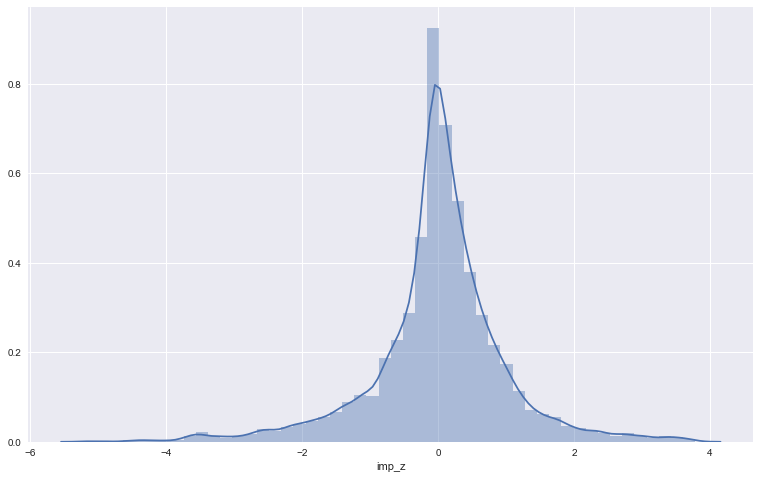

In [263]:
sns.set(font_scale = 1, context = 'notebook')
sns.distplot(
    df18a.imp_z
)

Ranking improvement, is actually quite normally distributed with a slight negative skew. Meaning on average athletes' ranking stay the same, with slightly more people dropping in ranking instead of improving

### Just for fun, let's see the top 10 most improved athletes in Asia

In [261]:
df18a.sort_values(by ='improvement', ascending = False)[df18a.Sex=='M'].head(10)

/Users/JHO/.virtualenvs/accelerateHK3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Name,Age,Affiliate_id,Overall_rank,Sex,rank17,improvement,Affiliate_name,Country,imp_z
User_id,,,,,,,,,,
319745,Keith Stillman,27,17764,2763,M,151198.0,148435.0,Port Tower CrossFit,Japan,3.784274
57487,Kim Jwa-Nyeon,43,9025,34873,M,179933.0,145060.0,CrossFit LOL,"Korea, Republic of",3.696482
1363804,Timofey Bakhurinskiy,25,14672,3815,M,148447.0,144632.0,CrossFit Astana,Kazakhstan,3.685349
733891,Zachary Thibodaux,24,2466,13953,M,155611.0,141658.0,Fight Tonight CrossFit,"Korea, Republic of",3.607988
967176,Eunwoong Lee,24,17675,41171,M,182305.0,141134.0,CrossFit MATE,"Korea, Republic of",3.594358
752725,Lee Byeong Su,27,16143,48961,M,189840.0,140879.0,CrossFit Shout,"Korea, Republic of",3.587724
278578,JiMoo Son,27,17606,291,M,139217.0,138926.0,CrossFit Limelight,"Korea, Republic of",3.536922
879011,Xingchen Li,30,17439,12561,M,149311.0,136750.0,Attitude CrossFit,China,3.480319
1097087,Paolo Volpe,30,13557,41938,M,178364.0,136426.0,CrossFit 6221,Indonesia,3.471891


In [262]:
df18a.sort_values(by ='improvement', ascending = False)[df18a.Sex=='F'].head(10)

/Users/JHO/.virtualenvs/accelerateHK3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Name,Age,Affiliate_id,Overall_rank,Sex,rank17,improvement,Affiliate_name,Country,imp_z
User_id,,,,,,,,,,
1232051,Xin Li,30,16529,53374,F,176131.0,122757.0,Chuncheng CrossFit,China,3.116327
517966,Angela Walter,20,87,7592,F,125564.0,117972.0,Humphreys CrossFit,"Korea, Republic of",2.991858
131387,Megumi Goto,38,17256,16643,F,124246.0,107603.0,CrossFit Daikanyama,Japan,2.722135
620569,Missy Elwell,42,10620,11452,F,114797.0,103345.0,Unified CrossFit,Guam,2.611374
704000,Si Yu Chen,35,14720,27295,F,123327.0,96032.0,CrossFit Body in Motion HuangPu,China,2.421145
666423,Jun Ge,34,10774,30445,F,125426.0,94981.0,CrossFit Bukit Timah,Singapore,2.393806
1274148,Boram Kim,34,15927,90451,F,184904.0,94453.0,CrossFit GUTS,"Korea, Republic of",2.380072
767317,Bobo Yu,37,12637,38721,F,119471.0,80750.0,Terracotta CrossFit,China,2.023623
649525,Yuki Day,35,12599,42158,F,120180.0,78022.0,CrossFit Habu,Japan,1.952661


In [264]:
df18ag = df18a.groupby('Affiliate_id')['improvement'].agg({'Num_Athletes': 'count', 
                                                           'Total_rank_improved': 'sum', 
                                                           'Avg_rank_improved': 'mean',
                                                           'Median_rank_improved': 'median'})
df18ag['Affiliate_name'] = df18ag.index.map(lambda x: GetAffiliateDet(x, 'Affiliate_name'))
df18ag['Country'] = df18ag.index.map(lambda x: GetAffiliateDet(x, 'Country'))
df18ag.sort_values( by = 'Total_rank_improved', ascending = False).head(15)

/Users/JHO/.virtualenvs/accelerateHK3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  after removing the cwd from sys.path.


,Num_Athletes,Total_rank_improved,Avg_rank_improved,Median_rank_improved,Affiliate_name,Country
Affiliate_id,,,,,,
4574,39,590534.0,15141.897436,9924.0,CrossFit EKB,Russian Federation
14574,23,515447.0,22410.739130,13294.0,Actualize CrossFit,Singapore
18507,12,501346.0,41778.833333,30873.0,CrossFit RK Olympicpark,"Korea, Republic of"
12640,51,443793.0,8701.823529,5486.0,CrossFit Redyar,Russian Federation
16276,27,423556.0,15687.259259,17580.0,Singa CrossFit,"Korea, Republic of"
17256,16,387475.0,24217.187500,13047.0,CrossFit Daikanyama,Japan
13853,25,375524.0,15020.960000,9531.0,CrossFit 4TP,"Korea, Republic of"
18581,11,370516.0,33683.272727,20964.0,CrossFit GangDong,"Korea, Republic of"
6582,35,366844.0,10481.257143,11125.0,CrossFit Teddygym,"Korea, Republic of"


In [186]:
df18ag[df18ag.Country == 'Hong Kong'].sort_values( by = 'Avg_rank_improved', ascending = False).head(15)

,Num_Athletes,Total_rank_improved,Avg_rank_improved,Median_rank_improved,Affiliate_name,Country
Affiliate_id,,,,,,
6874,41,205201.0,5004.902439,290.0,CrossFit CFPT,Hong Kong
15287,6,-11716.0,-1952.666667,8303.0,Lion Rock CrossFit,Hong Kong
6960,10,-26480.0,-2648.000000,-4648.5,CrossFit Typhoon,Hong Kong
18157,22,-77357.0,-3516.227273,-5222.0,Reebok CrossFit Asphodel,Hong Kong
5725,44,-155654.0,-3537.590909,765.5,CrossFit 852,Hong Kong
11248,22,-93719.0,-4259.954545,162.5,CrossFit Cavaliers,Hong Kong
17460,17,-170945.0,-10055.588235,6581.0,CrossFit FPG,Hong Kong
15225,30,-684962.0,-22832.066667,-4756.0,CrossFit Quarry Bay,Hong Kong


In [188]:
df18a[df18a.Affiliate_id == 18157].sort_values(by = 'improvement', ascending = False).head(10)

,Name,Age,Affiliate_id,Overall_rank,Sex,rank17,improvement,Affiliate_name,Country
User_id,,,,,,,,,
5102,Cristopher O'Brien,33,18157,15164,M,147416.0,132252.0,Reebok CrossFit Asphodel,Hong Kong
579357,Kylie Davies,45,18157,61530,F,106420.0,44890.0,Reebok CrossFit Asphodel,Hong Kong
1087812,Krios Yeung,39,18157,79948,M,113791.0,33843.0,Reebok CrossFit Asphodel,Hong Kong
257965,John Hermes,39,18157,50024,M,79775.0,29751.0,Reebok CrossFit Asphodel,Hong Kong
302951,Dennis Lai,50,18157,81153,M,98892.0,17739.0,Reebok CrossFit Asphodel,Hong Kong
662258,Shu Lee,31,18157,14950,F,27992.0,13042.0,Reebok CrossFit Asphodel,Hong Kong
38317,Milla Wu,37,18157,23710,F,35097.0,11387.0,Reebok CrossFit Asphodel,Hong Kong
100455,John Ho,32,18157,10428,M,16945.0,6517.0,Reebok CrossFit Asphodel,Hong Kong
503285,Brook Leach,35,18157,38518,M,43123.0,4605.0,Reebok CrossFit Asphodel,Hong Kong


### What is the improvement (normalized, distribution look like?)

In [229]:
df18test = df18a.copy(deep = True)
imp_mean = df18test.improvement.mean()
imp_std = df18test.improvement.std()
df18test['imp_z'] = df18test.improvement.apply( lambda x: (x - imp_mean)/ imp_std)

In [232]:
df18test.head(3)

,Name,Age,Affiliate_id,Overall_rank,Sex,rank17,improvement,Affiliate_name,Country,imp_z
User_id,,,,,,,,,,
231624,Deanna Clegg,27,9127,359,F,575.0,216.0,CrossFit Win Your Body,"Korea, Republic of",-0.071261
221169,Victoria Campos,25,18157,372,F,1124.0,752.0,Reebok CrossFit Asphodel,Hong Kong,-0.057319
51125,Megan Lovegrove,29,14975,411,F,10324.0,9913.0,CrossFit Tanjong Pagar,Singapore,0.180981


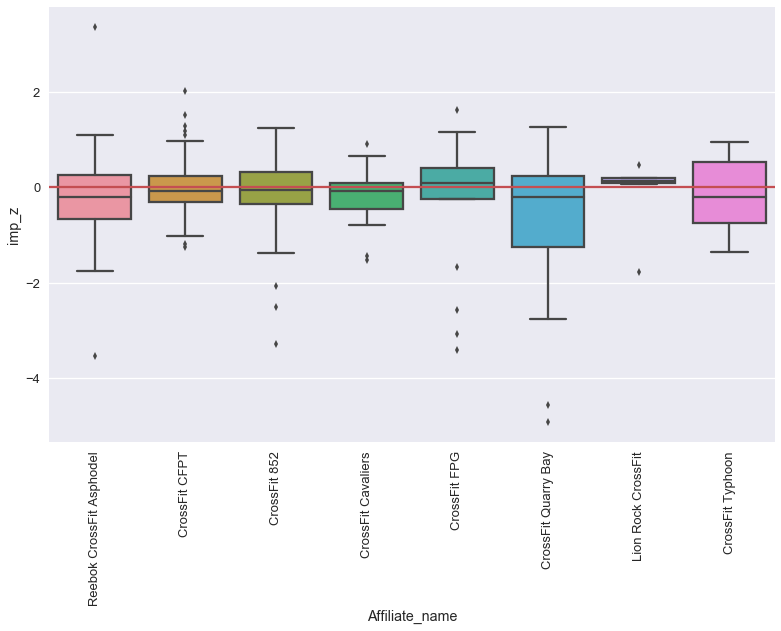

In [268]:
sns.set(font_scale = 1, context = 'talk')
g = sns.boxplot( data = df18test[ df18test.Country == 'Hong Kong'], 
            x = 'Affiliate_name', y = 'imp_z')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
mean_z = df18test.imp_z.mean()
g.hlines(mean_z, g.get_xlim()[0], g.get_xlim()[1], color = 'r')

/Users/JHO/.virtualenvs/accelerateHK3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


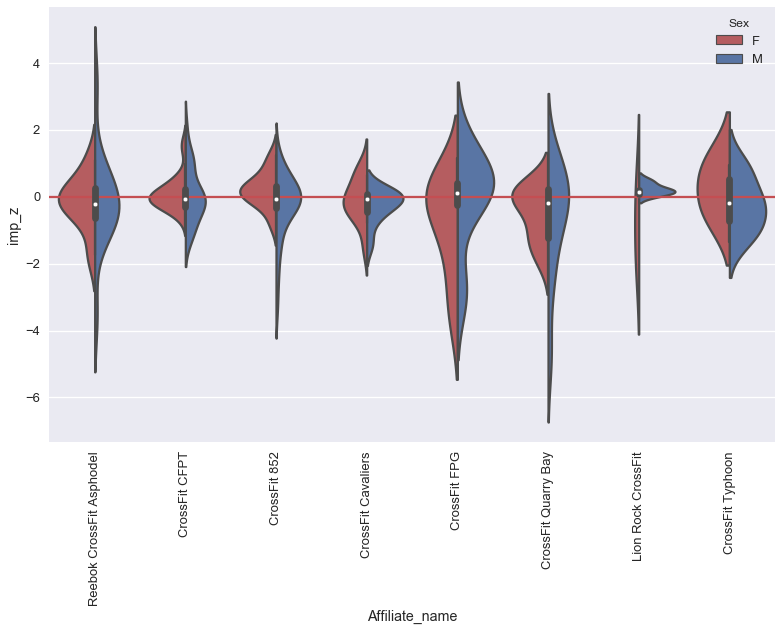

In [270]:
sns.set(font_scale = 1, context = 'talk')
g = sns.violinplot( data = df18test[ df18test.Country == 'Hong Kong'], 
            x = 'Affiliate_name', y = 'imp_z', hue = 'Sex', split=True,
            palette = ['r','b'])
g.set_xticklabels(g.get_xticklabels(), rotation=90)
mean_z = df18test.imp_z.mean()
g.hlines(mean_z, g.get_xlim()[0], g.get_xlim()[1], color = 'r')

In [255]:
df18test_ag[ df18test_ag.Country == 'Hong Kong'].sort_values( by = 'Total_rank_improved', ascending = False).head(15)

,Num_Athletes,Total_rank_improved,Avg_rank_improved,Median_rank_improved,Affiliate_name,Country
Affiliate_id,,,,,,
6874,41,2.185694,0.053310,-0.069336,CrossFit CFPT,Hong Kong
15287,6,-0.766042,-0.127674,0.139101,Lion Rock CrossFit,Hong Kong
6960,10,-1.457609,-0.145761,-0.197799,CrossFit Typhoon,Hong Kong
18157,22,-3.703604,-0.168346,-0.212717,Reebok CrossFit Asphodel,Hong Kong
11248,22,-4.129219,-0.187692,-0.072653,CrossFit Cavaliers,Hong Kong
17460,17,-5.753655,-0.338450,0.094308,CrossFit FPG,Hong Kong
5725,44,-7.431660,-0.168901,-0.056968,CrossFit 852,Hong Kong
15225,30,-20.123924,-0.670797,-0.200595,CrossFit Quarry Bay,Hong Kong
